In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import sqlite3 as lite 

In [2]:
plt.rcParams["font.family"] = "Arial Narrow"

In [3]:
times = ['0h', '1h', '4h', '7h', '10h', '24h', 'w24h']

In [6]:
db_path = '/home/fransua/Projects/Monica_p53/Hi-C_reps/'

In [19]:
db_path = '../../data/ComplementaryData/HiC/TADbit_results/'

In [21]:
values = []
names = []
num_names = []
stds = []
for nt1, time1 in enumerate(times):
    for nt2, time2 in enumerate(times):
        if time1 == time2:
#             name = f"{time1}-TR1 vs -TR2"
            name = f"{time1}-BR1 vs {time2}-BR2"
            num_name = nt1
            con = lite.connect(os.path.join(
                db_path, f'Cabrera_2022_HCT116_WT_NUT_{time1}_merge/trace.db'))
        else:
            name = f"{time1}-BR1 vs {time2}-BR2"
            num_name = nt1*10 + 10 + nt2
            con = lite.connect(os.path.join(
                db_path, f'Cabrera_2022_HCT116_WT_NUT_{time1}-{time2}_merge/trace.db'))
        cur = con.cursor()
        cur.execute("""
        select distinct scc, std_scc from MERGE_STATs
        """)
        jobids = cur.fetchall()
        v, s = jobids[0]
        values.append(v)
        stds.append(s)
        names.append(name)
        num_names.append(num_name)

In [8]:
idx = np.argsort(num_names)

In [9]:
values = np.asarray(values)
stds = np.asarray(stds)
names = np.array(names)

In [10]:
names = names[idx]
values = values[idx]
stds = stds[idx]

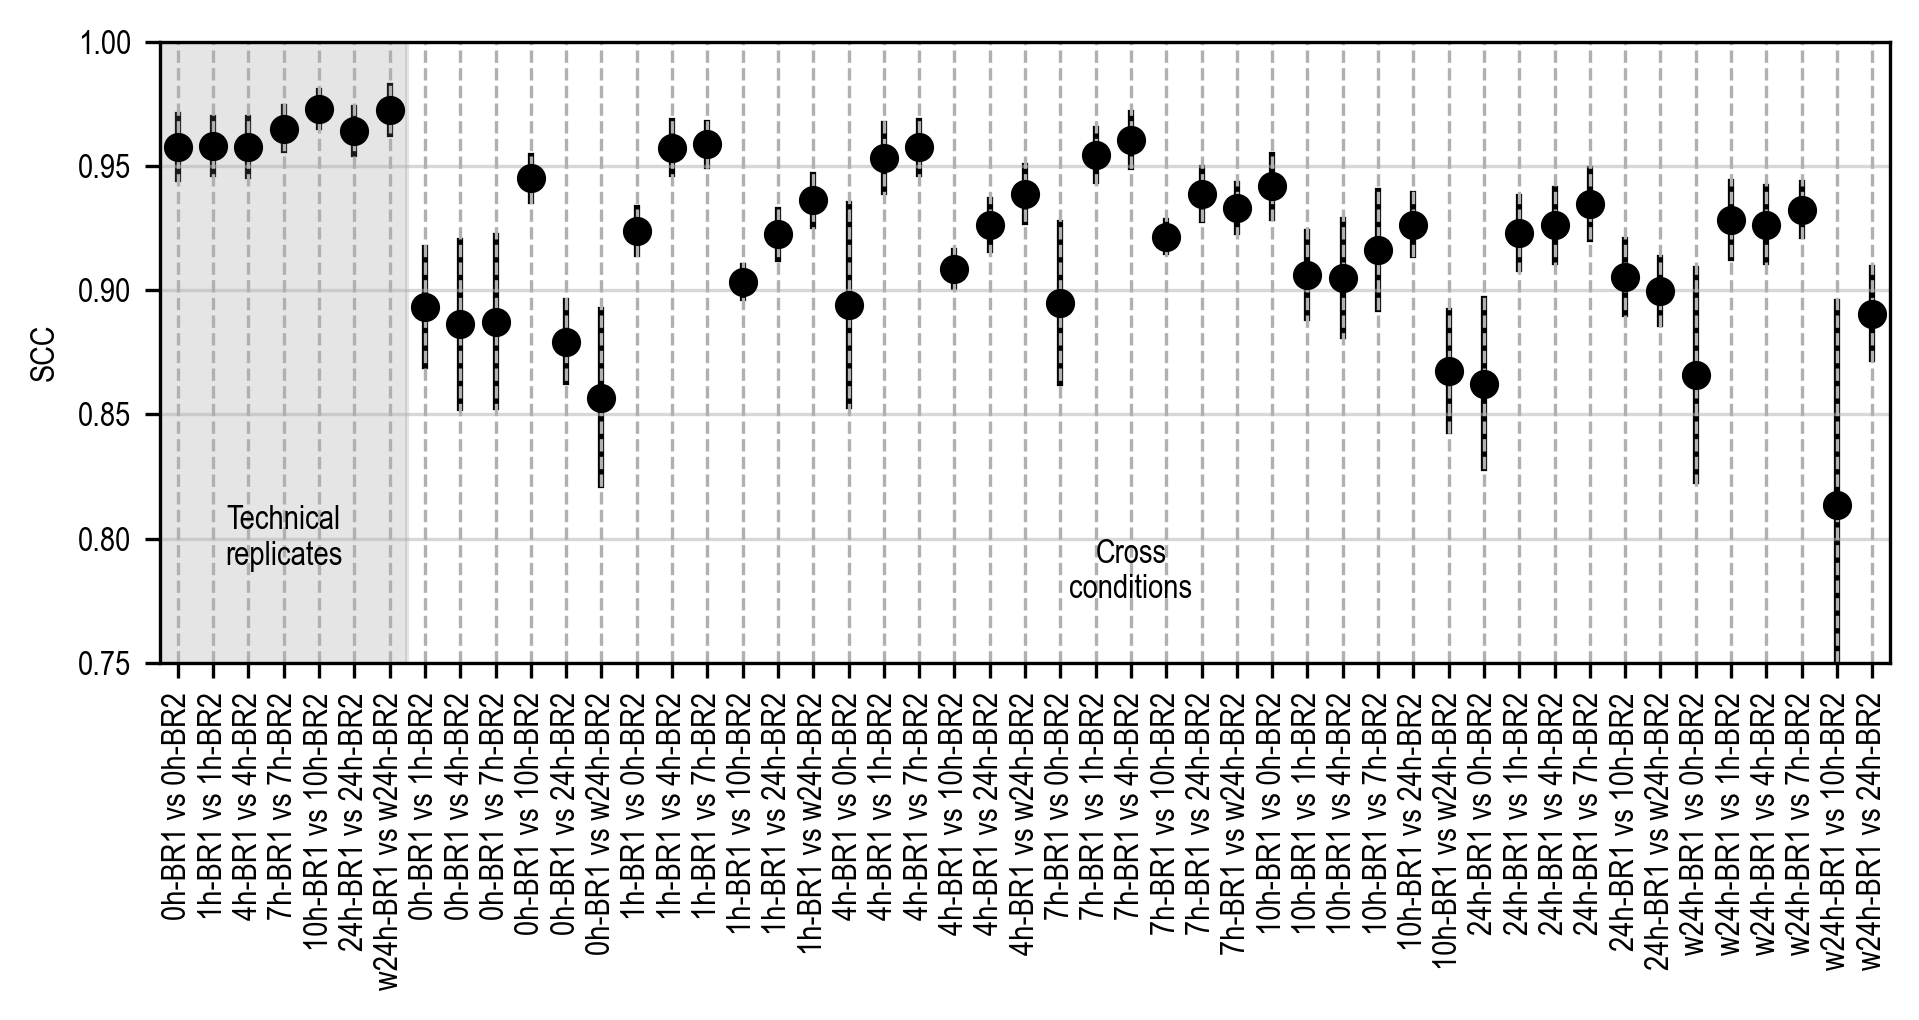

In [18]:
plt.figure(figsize=(6.5, 3.5), dpi=300)
x = list(range(len(values)))
plt.plot(x, values, 'o', color='k')
for i, v in enumerate(stds):
    plt.plot([i, i], [values[i] - 2 * stds[i], values[i] + 2 * stds[i]], color='k', zorder=-10)
# plt.axvline(x=0.95, color="tab:red", alpha=0.5)
plt.xticks(x, names, rotation=90, size=8)
plt.yticks(size=8)
plt.fill_between([-0.5, 6.5], 0, 1, color='tab:grey', alpha=0.2)
plt.ylim(0.75, 1)
plt.xlim(-0.5, len(values) - 0.5)
plt.grid(axis='x', ls='--')
plt.grid(axis='y', ls='-', alpha=0.5)
plt.ylabel('SCC', size=8)
plt.text(3, 0.8, 'Technical\nreplicates', ha='center', va='center', size=8)
plt.text(len(values) / 2 + 2.5, 0.8, 'Cross\nconditions', ha='center', va='top', size=8)
plt.tight_layout()
# plt.savefig("Suppl_SCC_r_w24h.pdf",dpi=300)
# plt.savefig("Suppl_SCC_r_w24h.png",dpi=300)

In [99]:
names

array(['0h-BR1 vs 0h-BR2', '1h-BR1 vs 1h-BR2', '4h-BR1 vs 4h-BR2',
       '7h-BR1 vs 7h-BR2', '10h-BR1 vs 10h-BR2', '24h-BR1 vs 24h-BR2',
       'w24h-BR1 vs w24h-BR2', '0h-BR1 vs 1h-BR2', '0h-BR1 vs 4h-BR2',
       '0h-BR1 vs 7h-BR2', '0h-BR1 vs 10h-BR2', '0h-BR1 vs 24h-BR2',
       '0h-BR1 vs w24h-BR2', '1h-BR1 vs 0h-BR2', '1h-BR1 vs 4h-BR2',
       '1h-BR1 vs 7h-BR2', '1h-BR1 vs 10h-BR2', '1h-BR1 vs 24h-BR2',
       '1h-BR1 vs w24h-BR2', '4h-BR1 vs 0h-BR2', '4h-BR1 vs 1h-BR2',
       '4h-BR1 vs 7h-BR2', '4h-BR1 vs 10h-BR2', '4h-BR1 vs 24h-BR2',
       '4h-BR1 vs w24h-BR2', '7h-BR1 vs 0h-BR2', '7h-BR1 vs 1h-BR2',
       '7h-BR1 vs 4h-BR2', '7h-BR1 vs 10h-BR2', '7h-BR1 vs 24h-BR2',
       '7h-BR1 vs w24h-BR2', '10h-BR1 vs 0h-BR2', '10h-BR1 vs 1h-BR2',
       '10h-BR1 vs 4h-BR2', '10h-BR1 vs 7h-BR2', '10h-BR1 vs 24h-BR2',
       '10h-BR1 vs w24h-BR2', '24h-BR1 vs 0h-BR2', '24h-BR1 vs 1h-BR2',
       '24h-BR1 vs 4h-BR2', '24h-BR1 vs 7h-BR2', '24h-BR1 vs 10h-BR2',
       '24h-BR1 vs w24h

In [23]:
sccs = np.full((7, 7), np.nan)
stds2 = np.full((7, 7), np.nan)
for pos, n in enumerate(names):
    n1, n2 = n.split(" vs ")
    tm1, tr1 = n1.split("-")
    if tr1 != "BR1":
        continue
    tm2, tr2 = n2.split("-")
    if tr2 != "BR2":
        continue
    if not tm2:
        tm2 = tm1
    i = times.index(tm1)
    j = times.index(tm2)
    if i > j:
        continue
    sccs[i, j] = values[pos]
    stds2[i, j] = stds[pos]

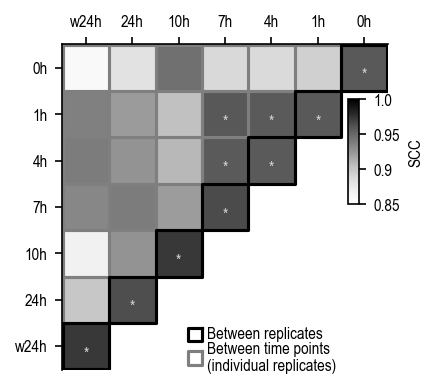

In [25]:
vmin = 0.85
fig = plt.figure(figsize=(3.5, 3.5), dpi=150)
axe = plt.subplot()
# plt.title(f'Correlation between first diagonals at 200 kb')
im = axe.imshow(sccs, origin='upper', vmin=vmin, vmax=1, cmap="Greys")

axc = plt.colorbar(im, ticks=[0.85, 0.9, 0.95, 1.0], aspect=10)
axc.ax.tick_params(labelsize=8)

axc.ax.set_position((0.67, 0.5, 0.2, 0.2))
#     axc.ax.axhline(0.95, color='tab:red')
axc.ax.set_ylabel('SCC', size=8)
axc.ax.set_yticklabels([0.85, 0.9, 0.95, 1.0])

axe.set_yticks(range(len(times)))
axe.set_yticklabels([s for s in times], size=8)
axe.set_xticks(range(len(times)))
axe.set_xticklabels([s for s in times], size=8)
axe.xaxis.tick_top()
axe.spines['right'].set_visible(False)
axe.spines['bottom'].set_visible(False)
axe.set_xlim(6.51, -0.51)
axe.set_ylim(6.51, -0.51)
for i in range(len(sccs)):
    for j in range(i, len(sccs)):
        if sccs[i, j] - 1 * stds2[i, j] >= 0.95:
            plt.text(j, i, '*', ha='center', va='top', size=8, color='lightgrey')
        if i != j:
            plt.plot([j + 0.5, j + 0.5, j - 0.5],
                     [i + 0.5, i - 0.5, i - 0.5], color='tab:grey')
    plt.plot([i - 0.5, i + 0.5, i + 0.5, i - 0.5, i - 0.5],
             [i - 0.5, i - 0.5, i + 0.5, i + 0.5, i - 0.5], color='k')

x0 = 3.5

plt.plot([x0, x0 + 0.3, x0 + 0.3, x0, x0], [6.1, 6.1, 6.4, 6.4, 6.1], color='tab:grey')
plt.text(x0 - 0.1, 6.25, 'Between time points\n(individual replicates)', va='center', ha='left', size=8)

plt.plot([x0, x0 + 0.3, x0 + 0.3, x0, x0], [5.6, 5.6, 5.9, 5.9, 5.6], color='k')
plt.text(x0 - 0.1, 5.75, 'Between replicates', va='center', ha='left', size=8)
# plt.savefig(f"SCC_matrix_grey{vmin}.pdf", dpi=300)
# plt.savefig(f"SCC_matrix_grey{vmin}.png", dpi=300)